In [ ]:
#  Part 1: Text Cleaning
# Load a sample document or paragraph from the dataset.

In [1]:
# Part 1 - Text Cleaning
import re
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv('/content/1429_1.csv')
text = df['reviews.text'].dropna().iloc[0]

/tmp/ipython-input-3654660810.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1429_1.csv')


In [5]:
# We perform basic text cleaning:

def clean_text(text):
    text = text.lower()               # Convert to lowercase
    text = re.sub(r'\d+', '', text)   # Remove digits
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuations
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

cleaned_text = clean_text(text)
cleaned_text

'this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease'

In [8]:
# Part 2: Tokenization
# Tokenize the cleaned text into:
# 1.Sentences
# 2.Word

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
# Sentence tokenization
sentences = sent_tokenize(cleaned_text)

sentences, words


(['this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease'],
 ['this',
  'product',
  'so',
  'far',
  'has',
  'not',
  'disappointed',
  'my',
  'children',
  'love',
  'to',
  'use',
  'it',
  'and',
  'i',
  'like',
  'the',
  'ability',
  'to',
  'monitor',
  'control',
  'what',
  'content',
  'they',
  'see',
  'with',
  'ease'])

In [14]:
# Word tokenization
words = word_tokenize(cleaned_text)

sentences, words

(['this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease'],
 ['this',
  'product',
  'so',
  'far',
  'has',
  'not',
  'disappointed',
  'my',
  'children',
  'love',
  'to',
  'use',
  'it',
  'and',
  'i',
  'like',
  'the',
  'ability',
  'to',
  'monitor',
  'control',
  'what',
  'content',
  'they',
  'see',
  'with',
  'ease'])

In [15]:
# Part 3: Stopword Removal
# Remove common stopwords from the word tokens.

# Compare results before and after removing stopwords. Comment on changes in word count and vocabulary.

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Removing stopwords
filtered_words = [word for word in words if word not in stop_words]


before_count = len(words)
after_count = len(filtered_words)
unique_before = len(set(words))
unique_after = len(set(filtered_words))

{
    "Before Removal": {"Word Count": before_count, "Unique Words": unique_before},
    "After Removal": {"Word Count": after_count, "Unique Words": unique_after},
    "Filtered Words": filtered_words
}

{'Before Removal': {'Word Count': 27, 'Unique Words': 26},
 'After Removal': {'Word Count': 13, 'Unique Words': 13},
 'Filtered Words': ['product',
  'far',
  'disappointed',
  'children',
  'love',
  'use',
  'like',
  'ability',
  'monitor',
  'control',
  'content',
  'see',
  'ease']}

In [18]:
# Part 4: Stemming and Lemmatization
# Apply both stemming (Porter or Snowball) and lemmatization.

# Compare the output of each technique on 10 selected words.

# Discuss scenarios where lemmatization is preferred over stemming.

from nltk.stem import PorterStemmer
import spacy

stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

In [21]:
# Lets sample words from the cleaned text
sample_words = filtered_words[:10]

# Lets apply stemming and lemmatization
stemmed = [stemmer.stem(w) for w in sample_words]
lemmatized = [token.lemma_ for token in nlp(" ".join(sample_words))]

list(zip(sample_words, stemmed, lemmatized))

[('product', 'product', 'product'),
 ('far', 'far', 'far'),
 ('disappointed', 'disappoint', 'disappointed'),
 ('children', 'children', 'child'),
 ('love', 'love', 'love'),
 ('use', 'use', 'use'),
 ('like', 'like', 'like'),
 ('ability', 'abil', 'ability'),
 ('monitor', 'monitor', 'monitor'),
 ('control', 'control', 'control')]

Discuss scenarios where lemmatization is preferred over stemming.

Lemmatization and stemming both reduce words to their base forms, but lemmatization is more accurate and context-aware, producing real dictionary words based on meaning and grammar. In contrast, stemming is faster but often imprecise, chopping off word endings without considering context. Lemmatization is preferred for tasks that require proper grammar and meaning, for example chatbots and translation.


In [35]:
# Part 5: POS Tagging

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from collections import Counter
import matplotlib.pyplot as plt





[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [37]:
from nltk import pos_tag

pos_tags = pos_tag(filtered_words)


In [38]:
# Count the frequency of each POS tag (e.g., NN, VB, JJ).

pos_counts = Counter(tag for word, tag in pos_tags)

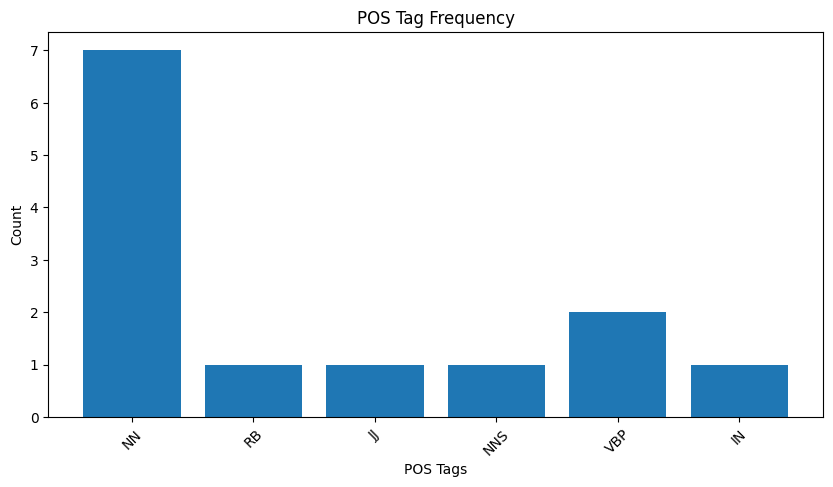

In [39]:
# Visualize it using a bar plot.

plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [40]:
# Part 6: Named Entity Recognition (NER)
# Extract named entities using spaCy or Hugging Face.

from spacy import displacy

doc = nlp(text)

entities = [(ent.text, ent.label_) for ent in doc.ents]

In [43]:
# Visualize entities using displacy or any plotting library.

displacy.render(doc, style='ent', jupyter=True)
